In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.data_loader import load_stratified_data
from src.pipelines import get_preprocessing_pipeline

Load Data

In [2]:
X_train, X_test, y_train, y_test = load_stratified_data()

Preprocessing Pipeline

In [3]:
pipeline = get_preprocessing_pipeline()
X_train_processed = pipeline.fit_transform(X_train)

In [4]:
print(f"Originally processed dimensions: {X_train_processed.shape}")

Originally processed dimensions: (491, 13)


### 1. PCA: 2D Visualization

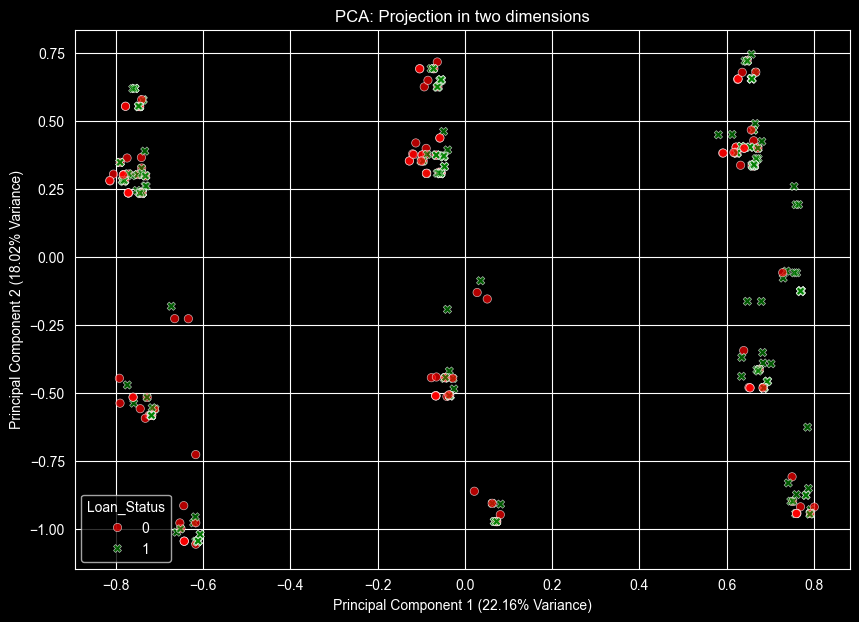

In [10]:
# Set PCA for 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_processed)

# Create temporary DataFrame for plotting
# Handle case where PCA returns DataFrame or numpy array
if isinstance(X_pca_2d, pd.DataFrame):
    X_pca_2d.columns = ['PC1', 'PC2']
    df_pca_2d = X_pca_2d.copy()
else:
    df_pca_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])

df_pca_2d['Loan_Status'] = y_train.values

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Loan_Status',
    style='Loan_Status',
    data=df_pca_2d,
    palette={0 : 'red', 1 : 'green'},
    alpha=0.7
)

plt.title('PCA: Projection in two dimensions')
plt.xlabel(f'Principal Component 1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.grid(True)
plt.show()

### 2. PCA: 3D Visualization

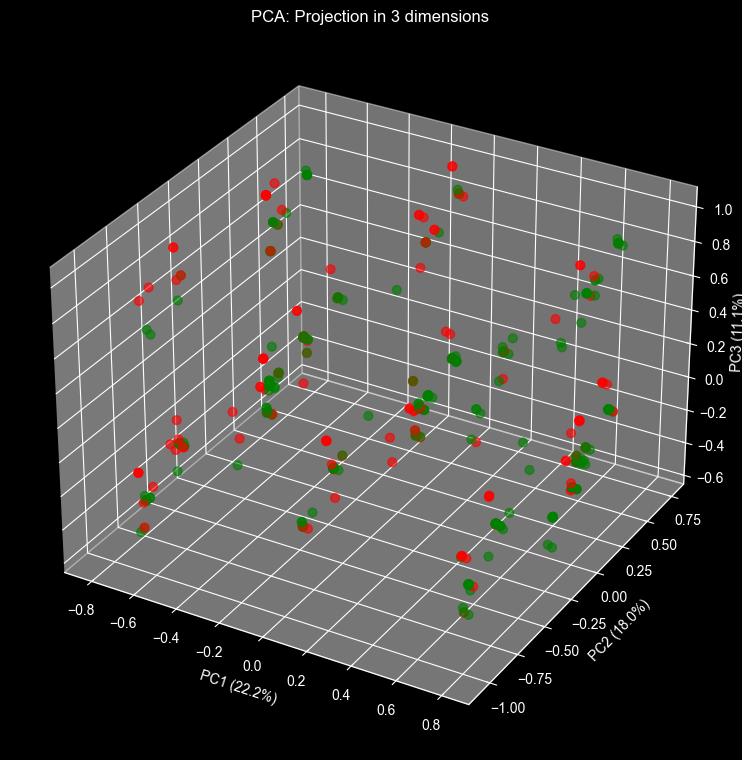

In [36]:
# Set PCA for 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train_processed)

# Convert to numpy array if it's a DataFrame
if isinstance(X_pca_3d, pd.DataFrame):
    X_pca_3d = X_pca_3d.values

# Set up the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Manually map colors based on numeric values (0 and 1)
colors = y_train.map({0: 'red', 1: 'green'})
markers = y_train.map({0: '^', 1: 'o'})

# Plot
ax.scatter(
    X_pca_3d[:, 0],
    X_pca_3d[:, 1],
    X_pca_3d[:, 2],
    c=colors,
    s=40,
    alpha=0.6
)

ax.set_title('PCA: Projection in 3 dimensions')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)', labelpad=5)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)', labelpad=5)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)', labelpad=0.5)

# Adjust subplot to prevent label clipping
plt.subplots_adjust(left=0.1, right=0.90, top=0.95, bottom=0.05)
plt.show()

### 3. Explain variance analysis

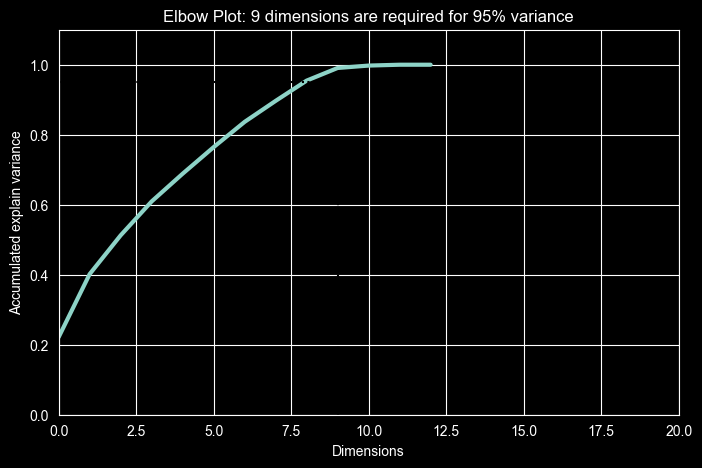

In [37]:
# Convert X_train_processed to numpy if it's a DataFrame to ensure compatibility
X_for_pca = X_train_processed.values if isinstance(X_train_processed, pd.DataFrame) else X_train_processed

pca_full = PCA()
pca_full.fit(X_for_pca)

cumsum = np.cumsum(pca_full.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.figure(figsize=(8, 5))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 20, 0, 1.1])
plt.xlabel("Dimensions")
plt.ylabel("Accumulated explain variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.title(f"Elbow Plot: {d} dimensions are required for 95% variance")
plt.show()